Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
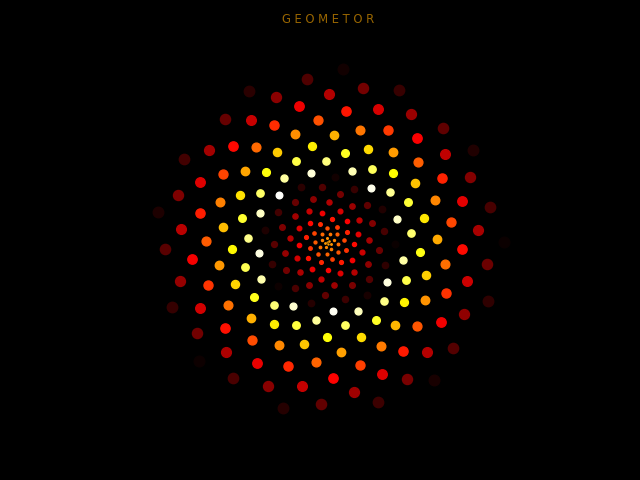

In [3]:
%run run.py
%matplotlib widget
log_init('spiral-3')

plt_init_polar()

radii = np.arange(0, 500, phi)
theta = 2 * np.pi * radii

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title('G E O M E T O R', fontdict={'color': '#960', 'size':'small'})
ax.set_axis_off()

def spiral(num_points, color_map=mp.cm.YlGn, color_cycles=21, rev=False, offset=0):
    for i in range(num_points):
        # radius = i * phi
        radius = num_points - i 
        theta = 2 * np.pi * i * phi
        color_scale = (((i + offset) % color_cycles) / color_cycles)
        if rev:
            color_scale = 1 - color_scale
        color = color_map(color_scale)
        ax.plot(theta, radius, marker='.', markersize=math.sqrt(radius), color=color)

spiral(233, color_map=mp.cm.hot, color_cycles=144)

In [5]:
# grow
cmap_name = 'YlGn'
cmap = mp.cm.get_cmap(cmap_name)

cycles = 144
# out = 'out/range'
out = f'out/{cycles}'
mkdir(out)

for n in range(1,1112):
    n_pad = str(n).zfill(4)
    # cycles = n
    
    plt.cla()
    plt_init_polar()
    ax.set_title(f'G E O M E T O R • {cmap_name} • n: {n_pad} • cycles: {cycles}', fontdict={'color': '#960', 'size':'small'})
    ax.set_axis_off()

    spiral(n, color_map=cmap, color_cycles=cycles)
    plt.savefig(f'{out}/spiral-{n_pad}.png', dpi=300)


In [21]:
# anmiate the number of cycles over a fixed size
n=444
n_pad = str(n).zfill(4)

cmap_name = 'PiYG'
cmap = mp.cm.get_cmap(cmap_name)

out = f'out/{cmap_name}'
if not os.path.isdir(out):
    os.mkdir(out)

for cycle in range(1, n+1):
    cycle_pad = str(cycle).zfill(4)
    plt.cla()
    plt_init_polar()
    ax.set_title(f'G E O M E T O R • {cmap_name} • n: {n_pad} • cycle: {cycle_pad}', fontdict={'color': '#960', 'size':'small'})
    ax.set_axis_off()

    spiral(n, color_map=cmap, color_cycles=cycle, rev=True)
    plt.draw()
    plt.savefig(f'{out}/{cmap_name}-{n_pad}-{cycle_pad}.png', dpi=300)


In [26]:
# rotate the cycle offset  over a fixed size and number of cycles
n=444
n_pad = str(n).zfill(4)

cycles=55
cycles_pad = str(cycles).zfill(4)

cmap_name = 'hsv'
cmap = mp.cm.get_cmap(cmap_name)

out = f'out/rotate'
if not os.path.isdir(out):
    os.mkdir(out)

for offset in range(cycles):
    plt.cla()
    plt_init_polar()
    ax.set_title(f'G E O M E T O R • {cmap_name} • n: {n_pad} • cycles: {cycles_pad} • offset: {offset}', fontdict={'color': '#960', 'size':'small'})
    ax.set_axis_off()

    spiral(n, color_map=cmap, color_cycles=cycles, offset=offset)
    plt.draw()
    plt.savefig(f'{out}/{cmap_name}-{n_pad}-{cycles_pad}-{str(offset).zfill(4)}.png', dpi=300)


In [ ]:
# anmiate the number of cycles over a fixed size
n=1220
n_pad = str(n).zfill(4)

cmap_name = 'hsv'
cmap = mp.cm.get_cmap(cmap_name)

out = f'out/overlay4'
if not os.path.isdir(out):
    os.mkdir(out)


for cycle in range(1, n+1):
    cycle_pad = str(cycle).zfill(4)
    # plt.cla()
    # plt_init_polar()
    for i in range(1,n+1):
        i_pad = str(i).zfill(4)
        plt.cla()
        plt_init_polar()
        ax.set_title(f'G E O M E T O R • {cmap_name} • n: {n_pad}-{i_pad} • cycle: {cycle_pad}', fontdict={'color': '#960', 'size':'small'})
        ax.set_axis_off()
        spiral(i, color_map=cmap, color_cycles=cycle)
        plt.savefig(f'{out}/{cmap_name}-{n_pad}-{cycle_pad}-{i_pad}.png', dpi=300)


In [1]:
377 + 233 + 610

1220